### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

Example input: `psi(2, 3)`

Example output: `[1, 2, 4, 8]`

- HINT: use FOR loop with `for i in range(m+1):` inside the psi function

In [3]:
def psi(number, m):
    # empty list to store the results
    products = []
    
    # for loop to append each result to products
    for i in range(m+1): # need +1 since range does not include the last number (m)
        products.append(number ** i)
    
    # return the products list as output
    return products

In [5]:
psi(2,4)

[1, 2, 4, 8, 16]

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

Example input: `h(2,2,3)`

Example output: `array([ 2,  4,  8, 16])`

- HINT: use the `np.dot` between the $\alpha$ and the output of psi(x, m)

In [6]:
import numpy as np

In [7]:
def h(x, alpha, m):
    return np.dot(alpha, psi(x, m))

In [8]:
h(2,2,3)

array([ 2,  4,  8, 16])

#### Task 3
Create a random 3rd order polynomial and call it `p3`

- HINT: check function `np.poly1d`

In [10]:
# According to numpy API reference, np.poly1d is obsolete
#from numpy.polynomial import Polynomial

In [11]:
p3 = np.poly1d([np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()])

In [13]:
print(np.poly1d(p3))

        3          2
0.9639 x + 0.2466 x + 0.6947 x + 0.4844


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

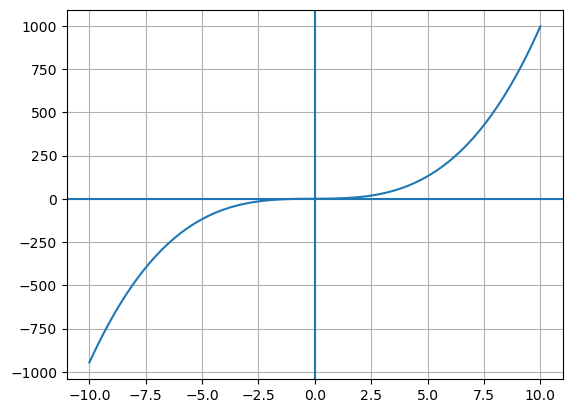

In [47]:
# let's plot the 3rd order polynomial in the -10,10 range
# define our range of x values
x = np.linspace(-10, 10, num=100)

# define the y(x) values
fx = []
for i in range(len(x)):
    fx.append(0.9639*x[i]**3 + 0.2466*x[i]**2 + 0.6947*x[i] + 0.4844)

# plot the figure
plt.plot(x,fx)
plt.grid()
plt.axvline()
plt.axhline()
plt.show()    

#### Task 4
Choose an interval `[a,b]`, on which the polynomial is S-shaped. 

At first we can choose random interval, for example `[-3,5)`, and come back to this task after **Task 7**.

In [ ]:
# plot polynomial, then just choose a region

In [59]:
interval = -4

In [60]:
interval2 = 4

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

- HINT: use `np.random.random_sample` function

Output `xs` should be numpy array with length=30 and values between `a` and `b`

In [61]:
xs = (interval2 - interval) * np.random.random_sample(30) - 4

In [62]:
xs

array([ 0.19810387,  2.87801208,  2.68158584,  1.74775636, -0.63095102,
       -2.93100737, -3.31240578,  0.7443059 , -1.05243459,  3.38072996,
       -2.53267988,  0.17625138, -1.87757613,  3.34196562,  1.36645253,
       -1.3872734 ,  3.93064442,  3.79093641,  3.32651915,  3.57340427,
       -1.50566203,  3.0342791 , -1.01039202,  1.78310262, -3.00939813,
        0.57100569, -2.96745172,  1.19543245,  2.26233135,  1.87591676])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

- HINT: `ys = p3(xs)`

In [63]:
ys = p3(xs)

In [64]:
ys

array([  0.63922194,  27.50506553,  22.708199  ,   7.59815797,
        -0.09783654, -23.70431735, -34.14334142,   1.5355935 ,
        -1.09717662,  42.89738746, -15.35273609,   0.6198068 ,
        -6.33070547,  41.53961887,   4.35359921,  -2.57820115,
        65.56296719,  59.17724034,  41.00690516,  50.09960145,
        -3.29267138,  31.7913669 ,  -0.96000523,   7.97207639,
       -25.64390837,   1.14097791, -24.59329584,   3.31406186,
        14.47958259,   9.01885951])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

Is the curve S-shaped? if not, repeat steps 3-7.

- HINT: check out function `plt.scatter`
- HINT: polynomial `p3 = np.poly1d([1,-3, 2,-1])` is S-shaped on the interval `[-3,5]`



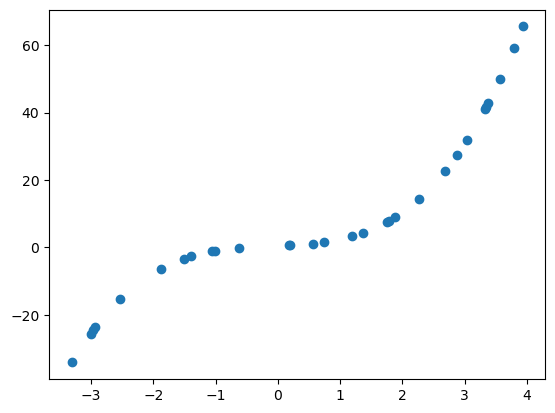

In [65]:
plt.scatter(xs, ys)

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi(x,m) from the **Task I**, create the matrix X defined as 

<img src="matrixX.png">

- HINT: Use a for loop and call psi(x,2) on every item in `xs`. Output should be stored as columns in matrix X.
- HINT: For `m = 2` and `len(xs) = 30`, the `X.shape = (3,30)`

In [83]:
mat_list = []

for i in range(len(xs)): 
    mat_list.append(psi(xs[i], 2))

X = np.array(mat_list).T

In [84]:
X.shape

(3, 30)

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6 and X is matrix from the Task 8.

- HINT: Numpy functions `np.dot`, `np.linalg.inv` and `transpose()` should be used

In [87]:
X.shape

(3, 30)

In [88]:
ys.shape

(30,)

In [97]:
# Calculate the dot product of X X^T
prod = np.dot(X, X.T)

# Calculate the pseudoinverse matrix
pseudo = np.linalg.inv(prod)

In [99]:
pseudo.shape

(3, 3)

In [101]:
alpha = np.dot(np.dot(pseudo, X), ys)
alpha

array([-3.22340954,  9.06874126,  1.22745964])

In [104]:
alpha.shape

(3,)

In [105]:
type(alpha)

numpy.ndarray

#### Task 10
Plot the original data and the computed polynomial which represents our prediction into one chart. Does it fit? We need to compute prediction using alpha from the **Task 9** for the each item in xs.

HINT: for first item in xs, prediction is `y_est = h(list(xs)[1],alpha, m)` where alpha is output of the **Task 9** and **m=2**. This needs to be repeated for every element of xs

In [109]:
estimates = []

for i in range(len(xs)):
    estimates.append(h(list(xs)[i], alpha, 2))

In [112]:
y_est = np.array(estimates)

(30,)

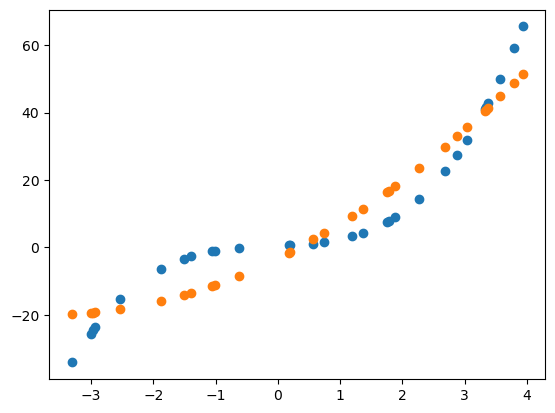

In [113]:
plt.scatter(xs, ys)
plt.scatter(xs,y_est)

The data does not fit perfectly since we didn't use the right polynomial order

#### Task 11
Repeat the process, **tasks 8-10**, for m=3,…,10. What do you observe? Which polynomial has the best fit?

In [134]:
mat_list2 = []

for i in range(len(xs)): 
    mat_list2.append(psi(xs[i], 3))

X = np.array(mat_list2).T

In [135]:
# Calculate the dot product of X X^T
prod = np.dot(X, X.T)

# Calculate the pseudoinverse matrix
pseudo = np.linalg.inv(prod)

In [136]:
alpha = np.dot(np.dot(pseudo, X), ys)

In [137]:
estimates = []

for i in range(len(xs)):
    estimates.append(h(list(xs)[i], alpha, 3))

In [138]:
y_est = np.array(estimates)

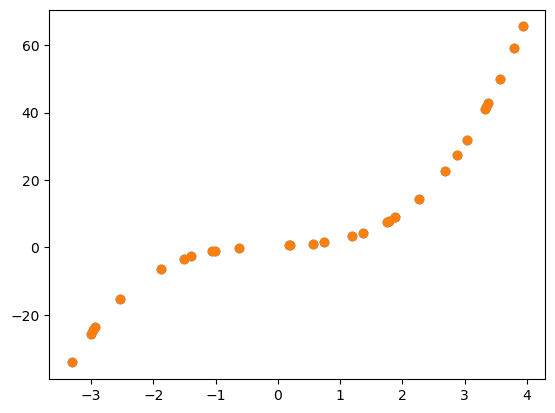

In [139]:
plt.scatter(xs, ys)
plt.scatter(xs,y_est)

From m=3 and so on, all of the predicted values fit the actual function. So, I would say m=3 is the best fit since it has lower complexity. 

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. 

y is our `ys` from the Task 6 and $\alpha^Tx$ are our predictions `y_est`. 

What do you observe? Could you tell the optimal m from the plot?

- HINT: loss can be computed as:

```
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()
```

In [ ]:
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()